In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import (datasets,model_selection as skms, neighbors, metrics as mt, linear_model as lm)
import sqlite3, pandas as pd
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
X,y = mnist.data, mnist.target 


In [2]:
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

In [3]:
print(X,y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] ['5' '0' '4' ... '4' '5' '6']


In [4]:
X.shape

(70000, 784)

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
type(X)

numpy.ndarray

In [9]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
X[4]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

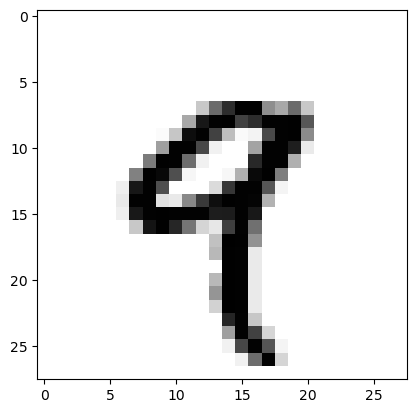

In [11]:
import numpy as np
import matplotlib.pyplot as plt

matriz = np.array(X[4])  # Coloca tu matriz aquí

# Redimensionar la matriz a una matriz de 28x28
matriz = matriz.reshape((28, 28))

# Mostrar la imagen en blanco y negro con la letra en color negro
plt.imshow(matriz, cmap='gray_r')
plt.show()


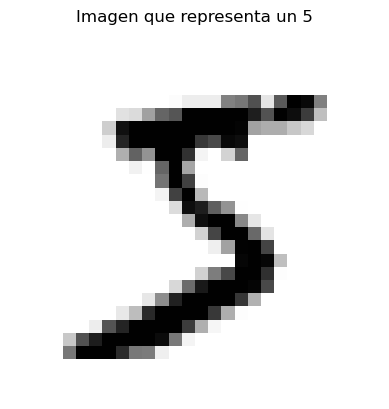

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
instancia = 0
some_digit = X[instancia]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.title('Imagen que representa un {}'.format(y[instancia])) 
plt.show()



In [13]:
y[4], type(y[5])

('9', str)

In [14]:
type(y[4])

str

In [15]:

import numpy as np 
y = y.astype(np.int8) # convierte todas las entradas del vector y en enteros  
y[4]



9

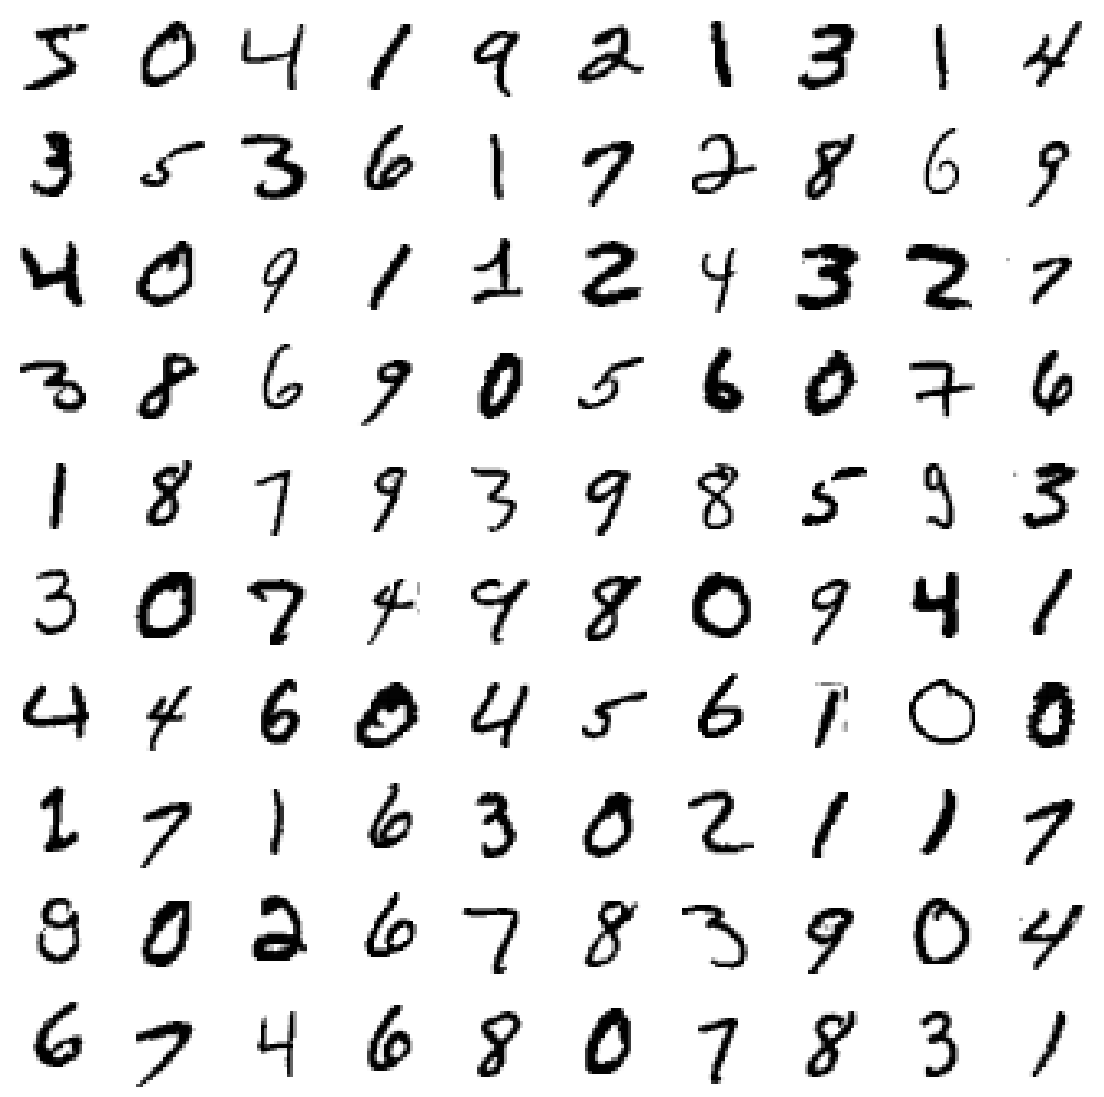

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(10,10, figsize = (14, 14))
instancia = 0
for fila in range(10):
    for columna in range(10):
        ax[fila,columna].imshow(X[instancia].reshape(28,28), cmap = 'binary')
        ax[fila, columna].axis('off')
        instancia+=1
        #plt.pause(0.1)
    

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [18]:


y_train_5 = (y_train == 5) # Vertadero para todos los cincos, False para los otros dígitos
y_test_5 = (y_test == 5)



In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:


%%time 
sgd_clf = SGDClassifier(random_state=42) # Instanciar la clase SGDClassifier
sgd_clf.fit(X_train, y_train_5) # alrededor de 21 segundos para entrenar el modelo



CPU times: user 15.6 s, sys: 288 ms, total: 15.9 s
Wall time: 15.7 s


SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([X_test[15]])

array([ True])

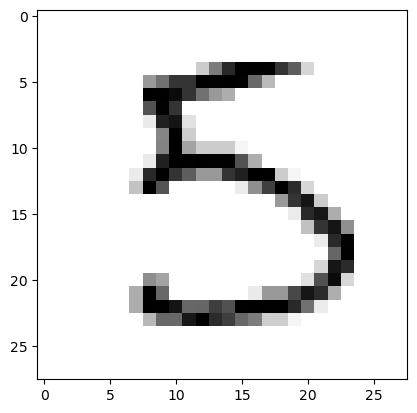

In [22]:
import numpy as np
import matplotlib.pyplot as plt

matriz = np.array(X_test[15])  # Coloca tu matriz aquí

# Redimensionar la matriz a una matriz de 28x28
matriz = matriz.reshape((28, 28))

# Mostrar la imagen
plt.imshow(matriz, cmap='gray_r')
plt.show()

In [27]:
from PIL import Image, ImageOps
import numpy as np

# Cargar la imagen y redimensionar a 28x28
imagen = Image.open('A.png')  # Reemplaza '2.jpg' con la ruta de tu imagen
imagen = imagen.resize((28, 28))

# Invertir los colores de la imagen
imagen_invertida = ImageOps.invert(imagen)

# Convertir la imagen invertida a una matriz NumPy en escala de grises
matriz_gris = np.array(imagen_invertida.convert('L'))

# Aplanar la matriz a un vector de 784 elementos
vector_784 = matriz_gris.reshape((1, 784))

# Imprimir el vector
print(vector_784)

# Predecir con el clasificador SGD
prediccion = sgd_clf.predict(vector_784)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 255 255   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
    0   0   0   0   0   0   0   0   0 

In [31]:
matriz = vector_784.reshape((28, 28))


In [32]:
print(matriz)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255   0   0   0   0   0   

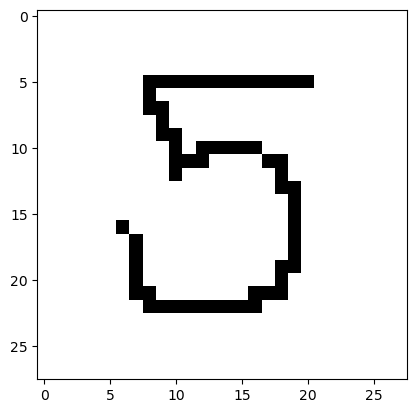

In [33]:
plt.imshow(matriz, cmap='gray_r')
plt.show()

In [ ]:
sns.heatmap(i)